# **Plot skin friction *Cf* for the solver "datadriven_wmSimpleFoam"**

1. No wall function

2. With standard wall function

3. Data-driven wall function with correction at the wall

4. Data-driven wall function with correction at the wall (with wall blending)

5. *Data-driven wall function with additional correction at the first face (velocity blending)*

6. *Data-driven wall function with additional correction at the first face (velocity & y+ blending)*

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path_nowall = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall = [pd.read_csv(tauw_path_nowall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [4]:
tauw_path_wall = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall = [pd.read_csv(tauw_path_wall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [5]:
tauw_path_ddwall = [run + 'flatPlate_wallCorrection_old/turbulentFlatPlate_onlyWall/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall = [pd.read_csv(tauw_path_ddwall[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.044530,1.000001,6.180830e-07,0.000014,2.964710e+06,837141.725520,1.001223e-11,6.657710e+07,2.895814e+06,18.497634,0.016905,19.302191,0.020932,76.027947,76.191244,-0.003268,0.260942
1,0.001458,0.057081,1.000000,7.922801e-07,0.000014,1.606910e+06,821469.822862,3.082805e-12,2.815156e+07,1.608274e+06,7.821568,0.003851,8.268407,0.004881,26.358804,26.399371,-0.003268,0.097871
2,0.002433,0.071337,1.000000,9.901606e-07,0.000014,1.204220e+06,797833.152955,1.947132e-12,1.688066e+07,1.204183e+06,4.690088,0.001242,5.024655,0.001591,19.461234,19.474244,-0.003268,0.050039
3,0.003410,0.088996,1.000000,1.235269e-06,0.000014,1.047753e+06,777236.114737,1.527977e-12,1.177298e+07,1.047698e+06,3.270981,0.000538,3.562071,0.000697,18.297708,18.303282,-0.003268,0.028363
4,0.004390,0.100570,1.000000,1.395918e-06,0.000014,9.676514e+05,760921.709577,1.325055e-12,9.621625e+06,9.676713e+05,2.673252,0.000211,2.942108,0.000277,18.566012,18.568246,-0.003268,0.019233


In [6]:
tauw_path_ddwall2 = [run + 'flatPlate_wallCorrection/turbulentFlatPlate_onlywall_wallBlend/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall2 = [pd.read_csv(tauw_path_ddwall2[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall2[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,...,wall_blending,face_blending,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.988010,1.000001,0.000014,0.000014,529004.974152,537824.014449,1.297970e-11,3.523883e+06,3.405108e+06,...,3.481633e+06,578274.542525,0.979022,0.009492,1.925044,0.018848,72.328934,72.327656,-0.003268,-0.006645
1,0.001458,0.995705,1.000000,0.000014,0.000014,455199.689706,474360.513908,3.051740e-12,1.528108e+06,1.520874e+06,...,1.521544e+06,480762.739024,0.424566,0.000060,0.847123,0.000219,5.164978,5.169904,-0.003268,-0.015115
2,0.002433,0.997028,1.000000,0.000014,0.000014,443685.415513,472799.659133,1.921414e-12,1.186007e+06,1.182765e+06,...,1.182482e+06,476170.642717,0.329518,0.000011,0.658135,0.000043,17.347238,17.348249,-0.003268,-0.016566
3,0.003410,0.997500,1.000000,0.000014,0.000014,439615.194351,475003.082330,1.561600e-12,1.064010e+06,1.061412e+06,...,1.061351e+06,477500.999990,0.295622,0.000005,0.590523,0.000017,18.886842,18.887249,-0.003268,-0.017084
4,0.004390,0.997749,1.000000,0.000014,0.000014,437468.174952,476164.249990,1.388989e-12,9.996577e+05,9.974590e+05,...,9.974078e+05,478250.501622,0.277743,0.000003,0.554875,0.000010,20.331365,20.331590,-0.003268,-0.017357


In [7]:
tauw_path_ddface = [run + 'flatPlate_revBlending/turbulentFlatPlate_velBlending/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface = [pd.read_csv(tauw_path_ddface[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,...,tau_y,skinFriction,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.993802,0.690304,0.000014,0.000010,527050.917369,536440.599806,-4.298585e-06,3.479020e+06,4.898384e+06,...,-0.810583,0.019930,0.966573,0.007537,2.327486,0.018577,72.812402,72.818768,-0.003268,-0.006835
1,0.001458,1.000147,0.912854,0.000014,0.000013,455261.139873,474419.447396,-1.209582e-06,1.529917e+06,1.675462e+06,...,-0.005769,0.008819,0.425069,0.000041,0.890576,0.000258,6.148420,6.156257,-0.003268,-0.015107
2,0.002433,1.001391,0.944048,0.000014,0.000013,443570.180996,472862.079231,-7.766151e-07,1.182553e+06,1.254661e+06,...,-0.001287,0.006825,0.328558,0.000010,0.677150,0.000047,17.065834,17.067059,-0.003268,-0.016581
3,0.003410,1.001852,0.954046,0.000014,0.000013,439459.324829,475087.407452,-6.378478e-07,1.059338e+06,1.112491e+06,...,-0.000521,0.006117,0.294324,0.000004,0.603416,0.000018,18.835514,18.835982,-0.003268,-0.017104
4,0.004390,1.002098,0.958911,0.000014,0.000013,437313.860771,476247.676768,-5.703194e-07,9.950325e+05,1.039901e+06,...,-0.000289,0.005747,0.276458,0.000002,0.565382,0.000010,20.296592,20.296846,-0.003268,-0.017377


In [8]:
tauw_path_ddface2 = [run + 'flatPlate_revBlending/turbulentFlatPlate_sigmoidBlending/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface2 = [pd.read_csv(tauw_path_ddface2[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface2[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,...,tau_y,skinFriction,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,1.0,1.000001,0.000014,0.000014,527177.892690,536530.573634,1.074684e-11,3.481935e+06,3.405407e+06,...,-0.942574,0.020072,0.967367,0.009440,1.913472,0.018827,72.322933,72.320190,-0.003268,-0.006823
1,0.001458,1.0,1.000000,0.000014,0.000014,454973.759999,474143.820018,2.304984e-12,1.521458e+06,1.520784e+06,...,-0.006935,0.008769,0.422719,0.000059,0.845250,0.000216,5.149448,5.154374,-0.003268,-0.015143
2,0.002433,1.0,1.000000,0.000014,0.000014,443567.278787,472863.651269,1.424385e-12,1.182466e+06,1.182749e+06,...,-0.001359,0.006815,0.328534,0.000011,0.657147,0.000043,17.349331,17.350341,-0.003268,-0.016581
3,0.003410,1.0,1.000000,0.000014,0.000014,439526.691692,475050.962611,1.148310e-12,1.061358e+06,1.061419e+06,...,-0.000546,0.006117,0.294885,0.000005,0.589788,0.000017,18.886121,18.886529,-0.003268,-0.017095
4,0.004390,1.0,1.000000,0.000014,0.000014,437393.447230,476204.650508,1.017500e-12,9.974179e+05,9.974691e+05,...,-0.000303,0.005749,0.277120,0.000003,0.554255,0.000010,20.330484,20.330709,-0.003268,-0.017367


In [9]:
x0 = 0
Rex = (tauw_data_nowall[0]['ccx'] - x0)*UInf/nuInf
Cf_nowall = [np.sqrt(tauw_data_nowall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wall = [np.sqrt(tauw_data_wall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_wall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_wall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_ddwall = [tauw_data_ddwall[i + len(res_list)*j]['nuEff_wall']*tauw_data_ddwall[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_ddwall2 = [tauw_data_ddwall2[i + len(res_list)*j]['nuEff_wall']*tauw_data_ddwall2[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_ddface = [tauw_data_ddface[i + len(res_list)*j]['skinFriction'] for j in range(len(yp)) for i in range(len(res_list))]
Cf_ddface2 = [tauw_data_ddface2[i + len(res_list)*j]['skinFriction'] for j in range(len(yp)) for i in range(len(res_list))]

In [10]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

### Comparison of *Cf* for various settings

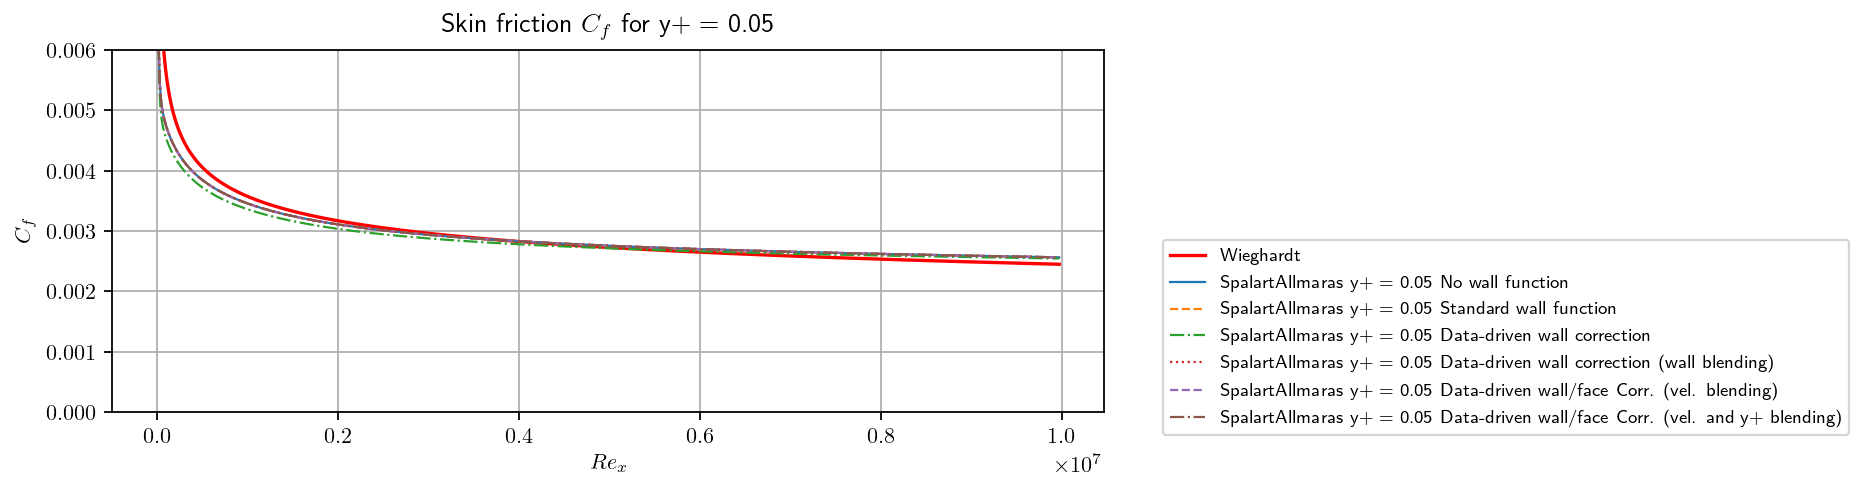

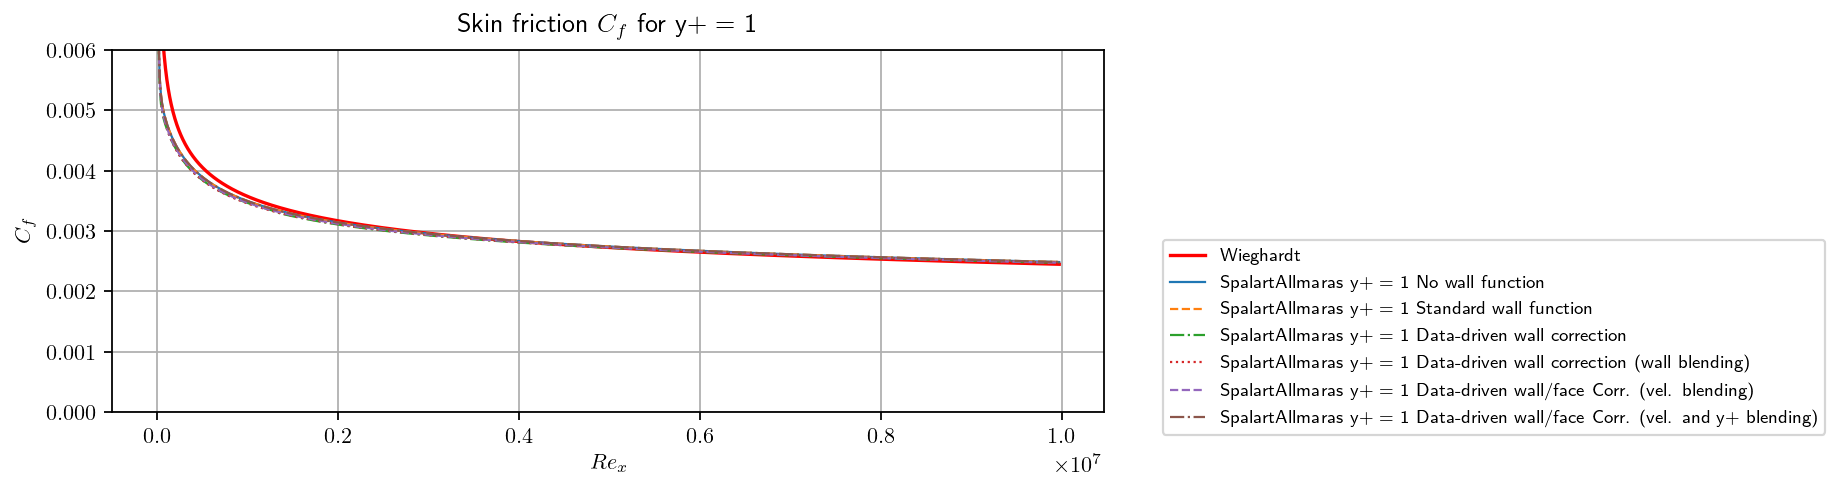

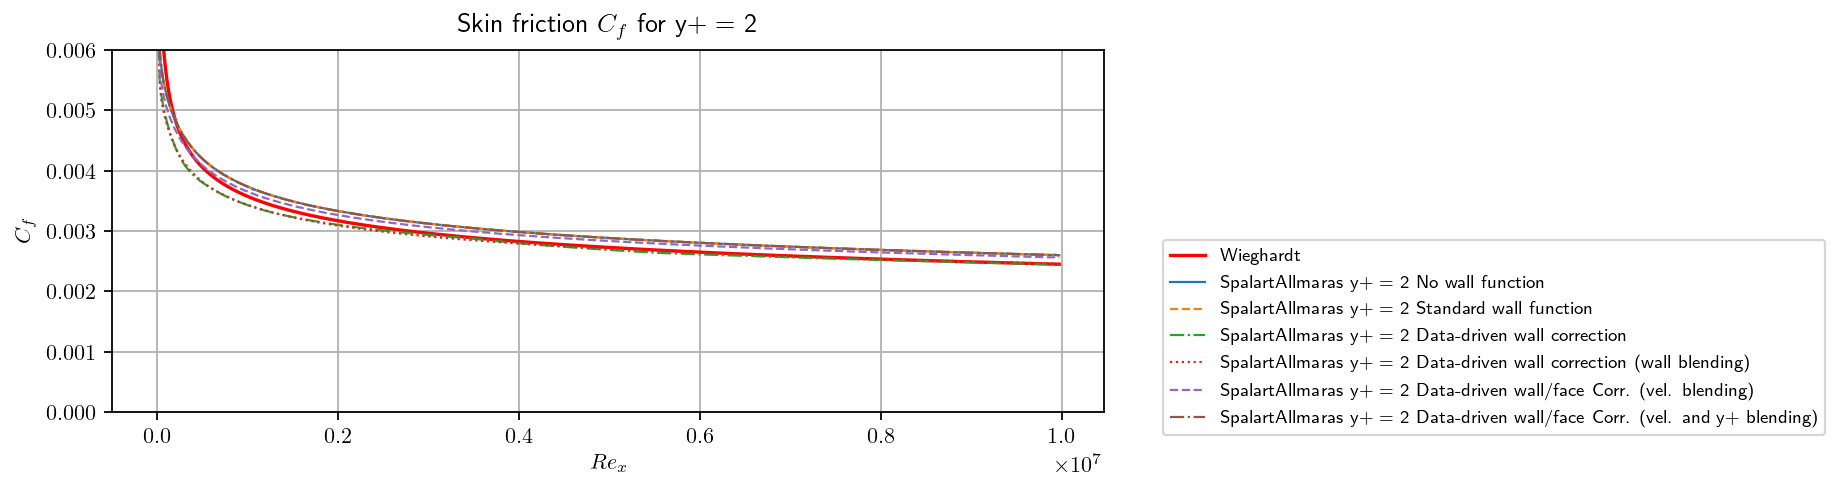

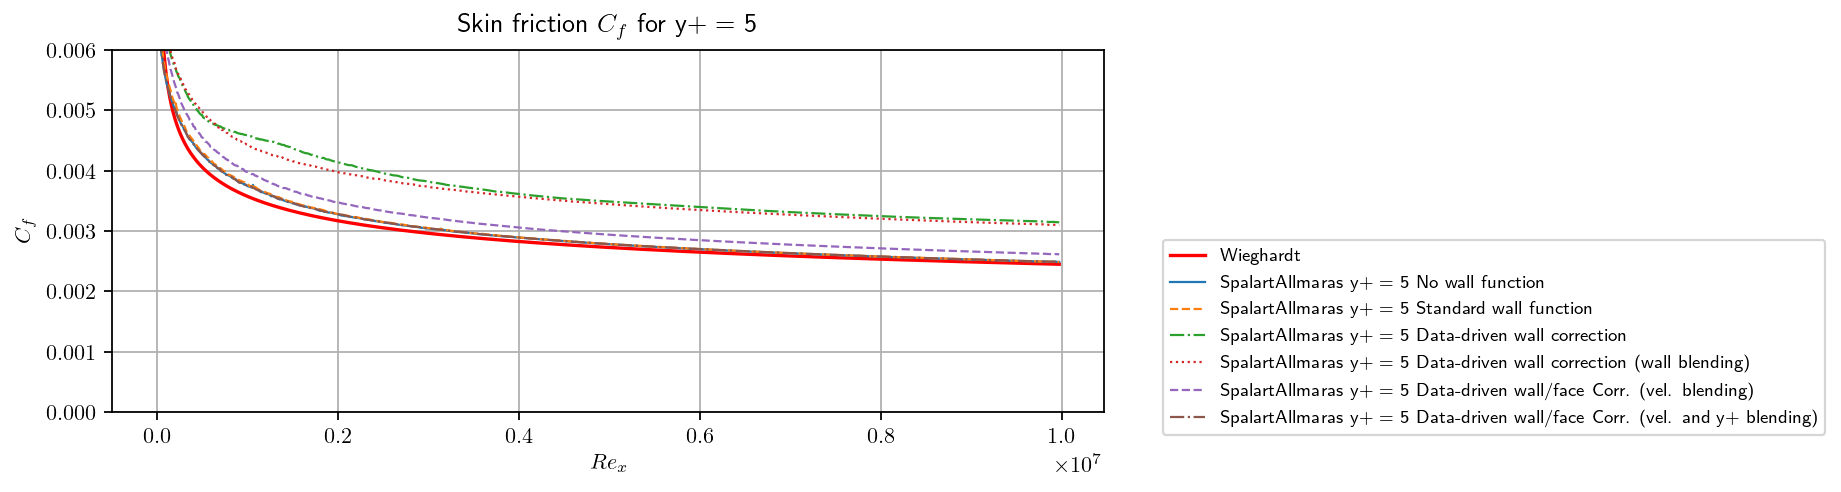

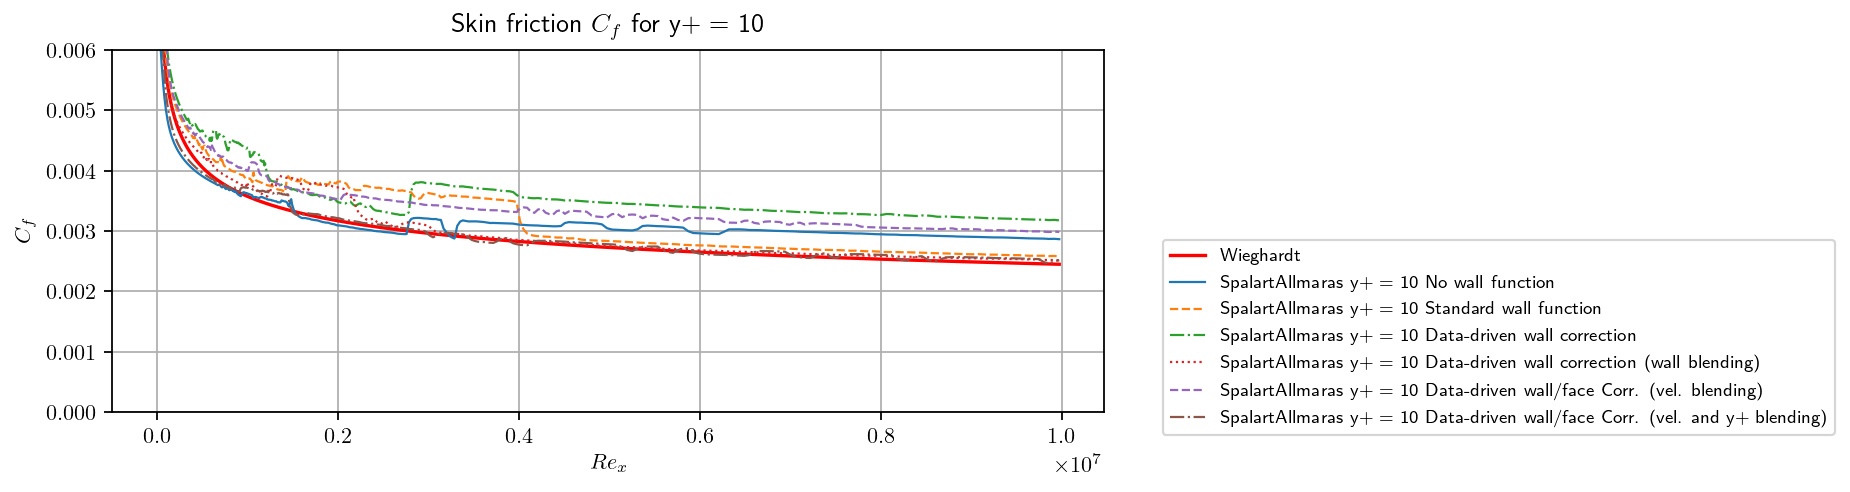

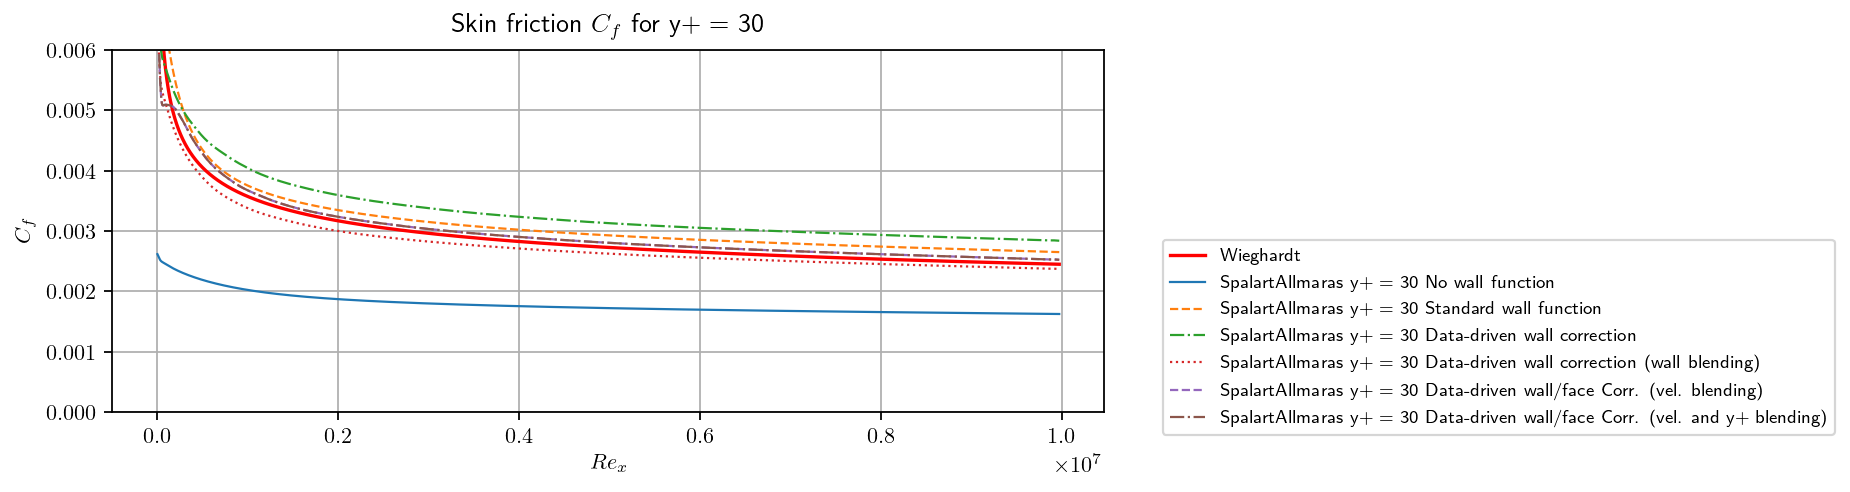

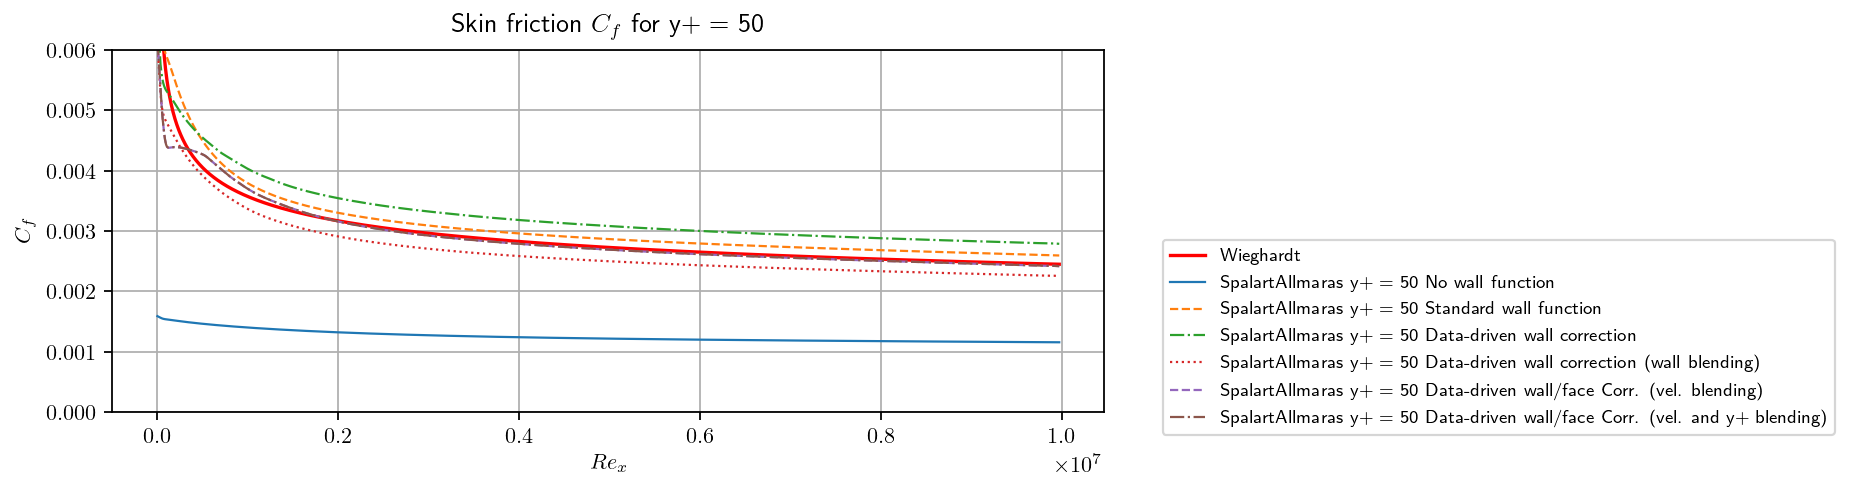

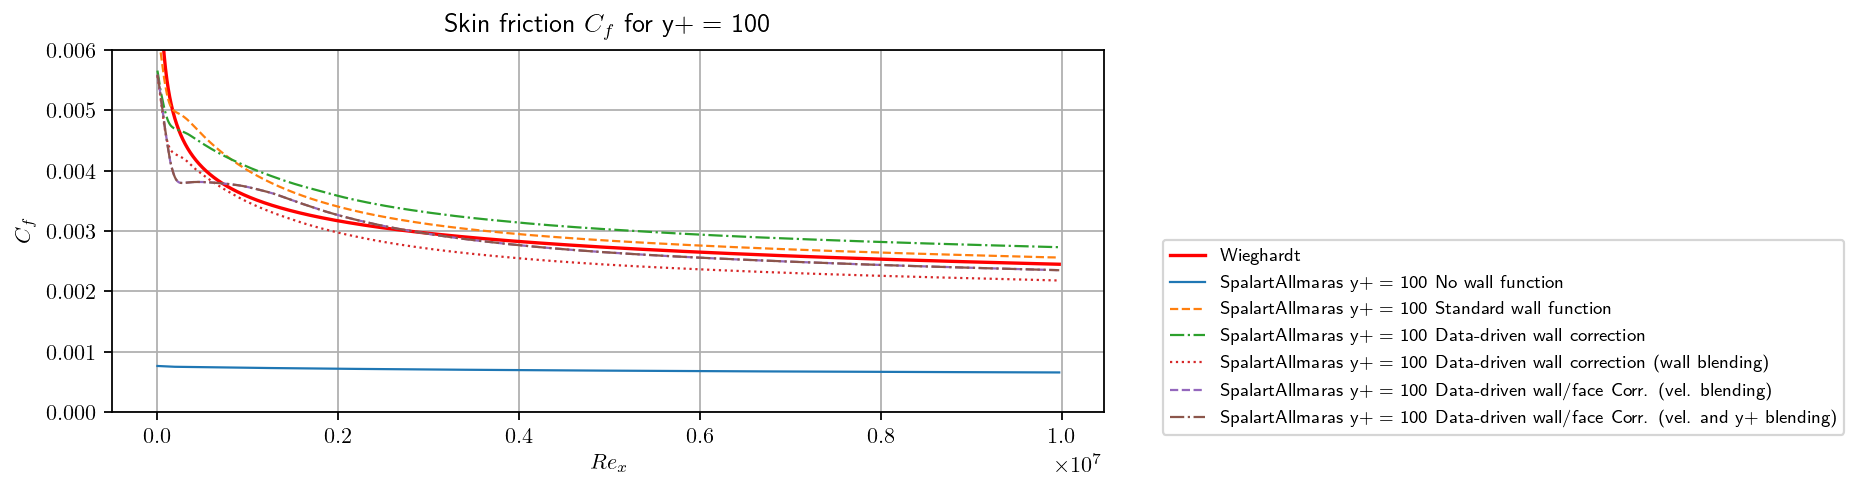

In [16]:
style = ["-", "--", "-.", ":", "--", "-."]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin friction $C_f$ for y+ = {}".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "{} y+ = {} No wall function".format(model_sa, yp[j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_wall[i + len(res_list)*j], label = "{} y+ = {} Standard wall function".format(model_sa, yp[j]), ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "{} y+ = {} Data-driven wall correction".format(model_sa, yp[j]), ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)
        ax.plot(Rex, Cf_ddwall2[i + len(res_list)*j], label = "{} y+ = {} Data-driven wall correction (wall blending)".format(model_sa, yp[j]), ls = style[i+3], c = "C{:d}".format(i+3), lw = lw)
        ax.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "{} y+ = {} Data-driven wall/face Corr. (vel. blending)".format(model_sa, yp[j]), ls = style[i+4], c = "C{:d}".format(i+4), lw = lw)
        ax.plot(Rex, Cf_ddface2[i + len(res_list)*j], label = "{} y+ = {} Data-driven wall/face Corr. (vel. and y+ blending)".format(model_sa, yp[j]), ls = style[i+5], c = "C{:d}".format(i+5), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))        

### Comparison *Cf* of data-driven wall function with the correction at the wall for different *y+*

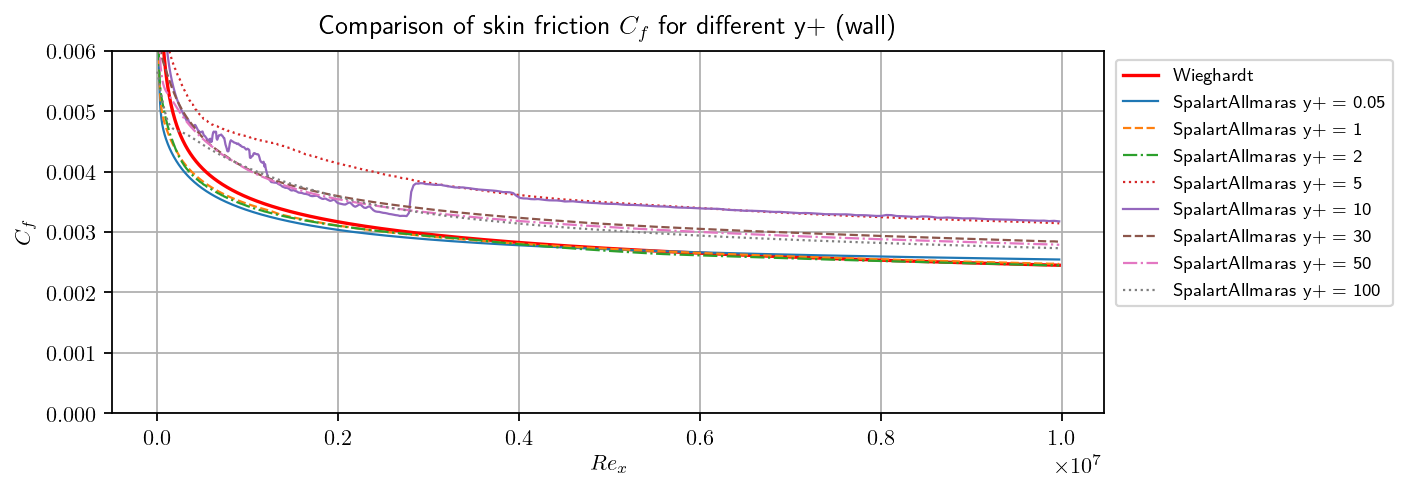

In [17]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
stylecycler = cycle(style2)

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax2.set_xlabel(r"$Re_x$")
ax2.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ (wall)")
ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        

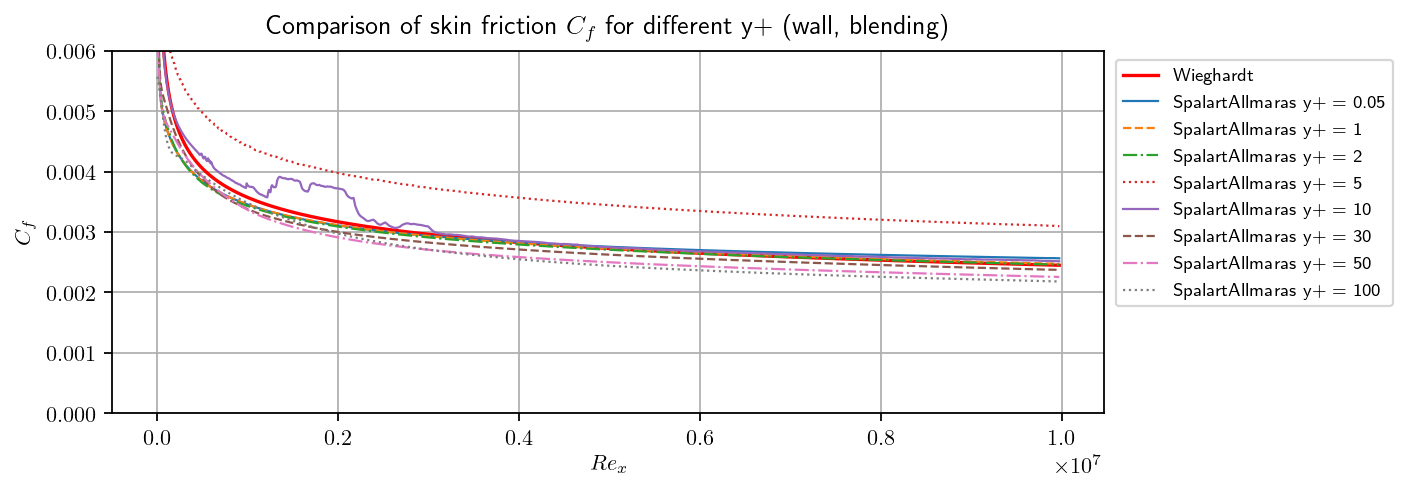

In [13]:
fig2_b, ax2_b = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax2_b.set_xlabel(r"$Re_x$")
ax2_b.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ (wall, blending)")
ax2_b.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2_b.plot(Rex, Cf_ddwall2[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2_b.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        

### Comparison *Cf* of data-driven wall function with the correction at the first face for different *y+*

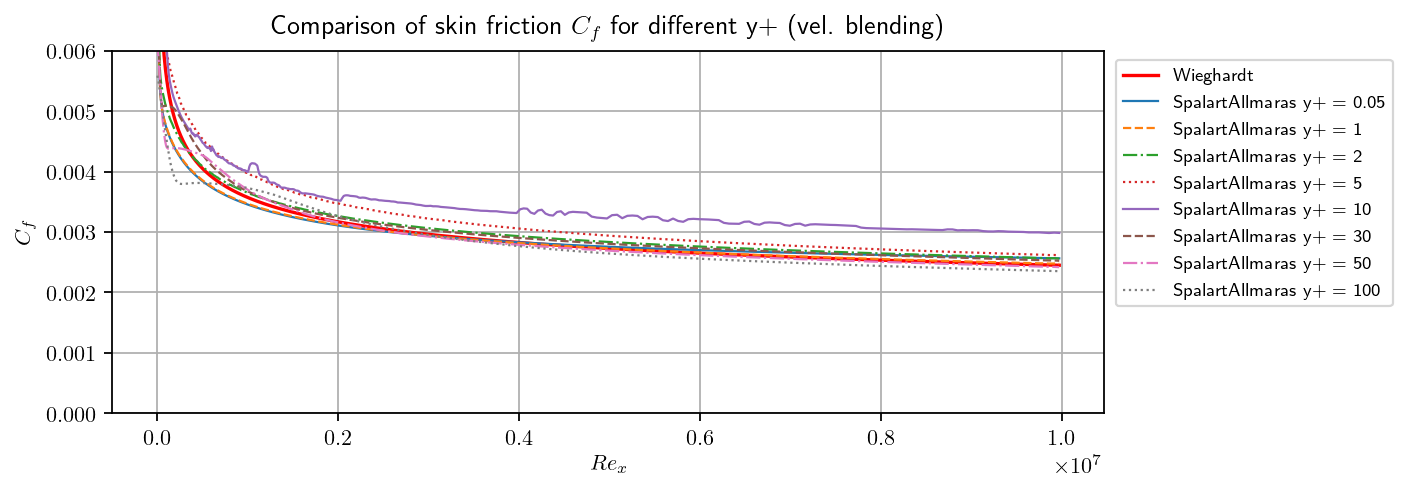

In [14]:
style3 = ["-", "--", "-.", ":"]
lw3 = 1.0
stylecycler2 = cycle(style3)

fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax3.set_xlabel(r"$Re_x$")
ax3.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ (vel. blending)")
ax3.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax3.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler2), c = "C{:d}".format(j), lw = lw3)
        ax3.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        

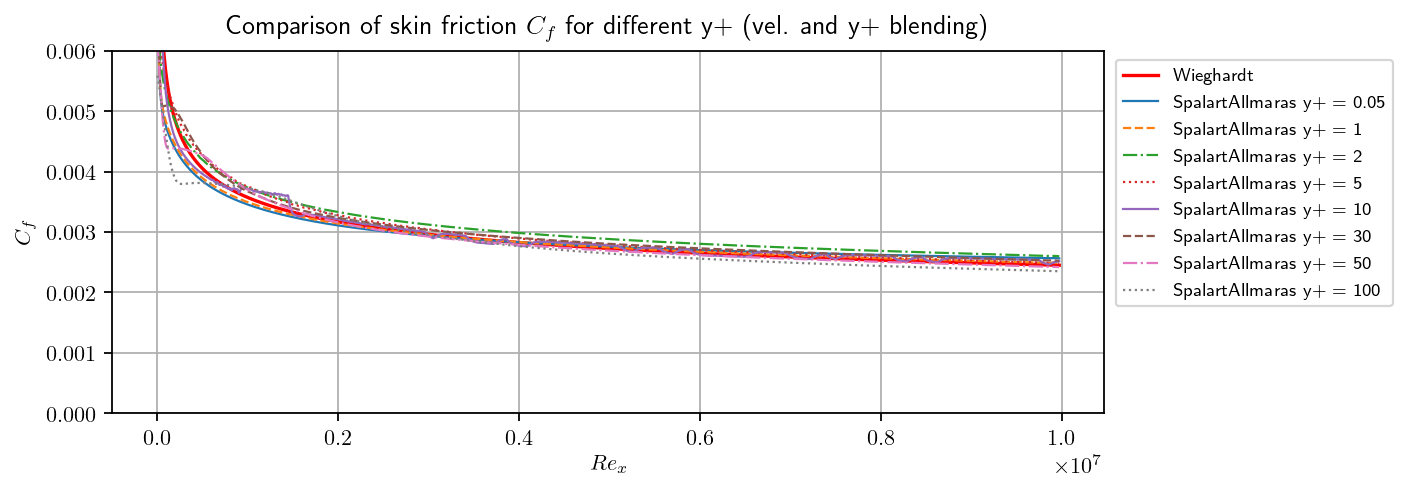

In [15]:
style4 = ["-", "--", "-.", ":"]
lw4 = 1.0
stylecycler3 = cycle(style4)

fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax4.set_xlabel(r"$Re_x$")
ax4.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ (vel. and y+ blending)")
ax4.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax4.plot(Rex, Cf_ddface2[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler3), c = "C{:d}".format(j), lw = lw4)
        ax4.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        